# **Лабораторная работа №2. Визуализация данных с использованием библиотек Python. MatPlotLib.**

**Описание данных**

* **duration** - Продолжительность грудного вскармливания (нед.). *Количественная*.

* **delta** - Индикатор завершения грудного вскармливания (1=да, 0=нет). *Категориальный*

* **race** - Раса матери (1=белая, 2=черная, 3=другая). *Категориальный*

* **poverty** - Мать в бедности (1=да, 0=нет). *Категориальный*

* **smoke** - Мать курила при рождении ребенка (1=да, 0=нет). *Категориальный*

* **alcohol** - Мать употребляла алкоголь при рождении ребенка (1=да, 0=нет). *Категориальный*

* **agemth** - Возраст матери при рождении ребенка. *Количественный*

* **ybirth** - Год рождения ребенка. *Количественный*

* **yschool** - Уровень образования матери (годы обучения). *Количественный*

* **pc3mth** - Дородовой уход после 3-го месяца (1=да, 0=нет). *Категориальный*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
data = pd.read_csv('/content/sample_data/bfeed.csv')

In [ ]:
data.head(5)

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
0,1,16,1,1,0,0,1,24,82,14,0
1,2,1,1,1,0,1,0,26,85,12,0
2,3,4,0,1,0,0,0,25,85,12,0
3,4,3,1,1,0,1,1,21,85,9,0
4,5,36,1,1,0,1,0,22,82,12,0


In [ ]:
# Структура данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  927 non-null    int64
 1   duration    927 non-null    int64
 2   delta       927 non-null    int64
 3   race        927 non-null    int64
 4   poverty     927 non-null    int64
 5   smoke       927 non-null    int64
 6   alcohol     927 non-null    int64
 7   agemth      927 non-null    int64
 8   ybirth      927 non-null    int64
 9   yschool     927 non-null    int64
 10  pc3mth      927 non-null    int64
dtypes: int64(11)
memory usage: 79.8 KB


**Выводы:**
Датасет содержит 10 признаков, 4 из которых количественные, остальные - категориальные. 

Дальнейшее исследование не предполагает:
*   Обработку пропусков
*   Интеграцию данных
*   Преобразование данных
*   Перебалансировку данных

На основе уже имеющейся информации, предположу, что длительность кормления грудью,  как фактор, зависящий от состояния здоровья матери, должен значительно коррелировать с признаками ***smoke*** и ***alcohol***. В дальнейшем исследовании уделим особое внимание подверждению этой гипотезы.

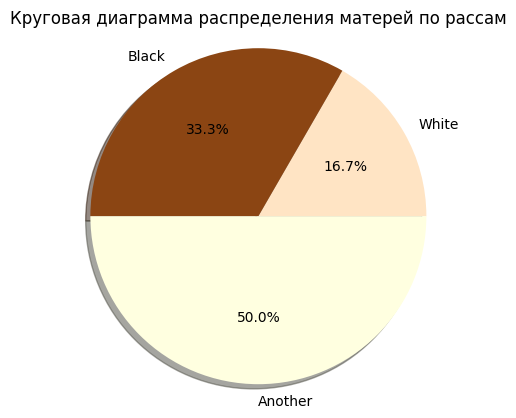

In [ ]:
vals = pd.unique(data['race'])
labels = ['White', 'Black', 'Another']
colors = ['bisque','saddlebrown','lightyellow']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
ax.axis('equal')
plt.title('Круговая диаграмма распределения матерей по рассам')
# plt.legend()
plt.show()

In [ ]:
# Распределения количественных признаков
# distr_df = data[['duration','agemth','ybirth','yschool']]
# distr_df.hist(figsize=(10,15), edgecolor='k',
#         linewidth=1,)

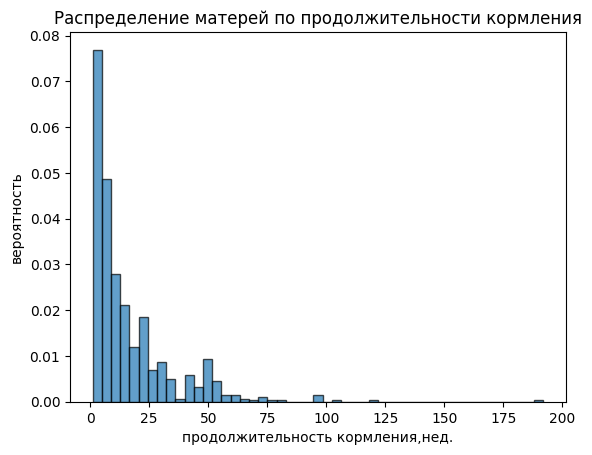

In [ ]:
plt.hist(data['duration'], density='True',alpha = 0.7, edgecolor='k',
         linewidth=1,bins=len(pd.unique(data['duration'])))
plt.title('Распределение матерей по продолжительности кормления')
plt.xlabel('продолжительность кормления,нед.')
plt.ylabel('вероятность')
plt.show()

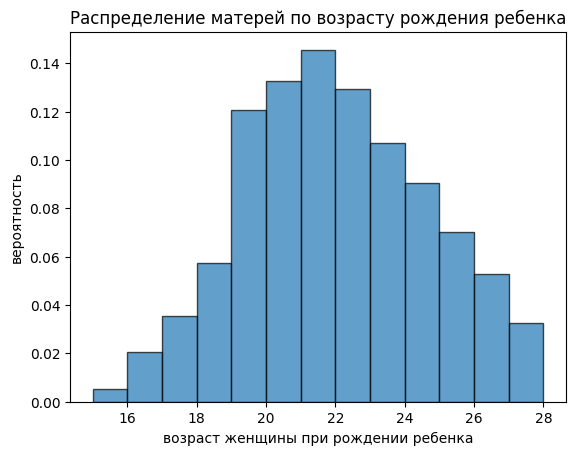

In [ ]:
plt.hist(data['agemth'], density='True',alpha = 0.7, edgecolor='k',
         linewidth=1,bins=(len(pd.unique(data['agemth']))-1))
plt.title('Распределение матерей по возрасту рождения ребенка')
plt.xlabel('возраст женщины при рождении ребенка')
plt.ylabel('вероятность')
plt.show()

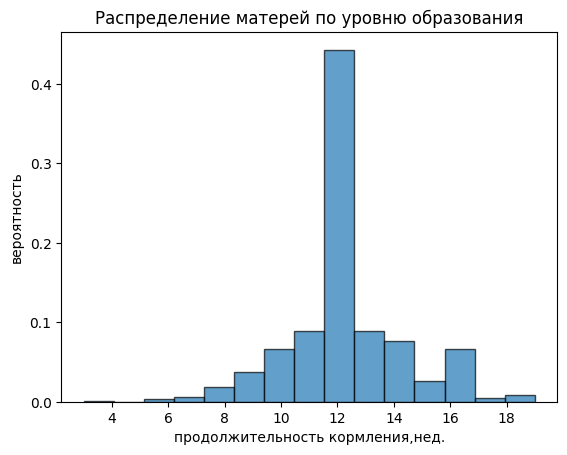

In [ ]:
plt.hist(data['yschool'], density='True',alpha = 0.7, edgecolor='k',
         linewidth=1,bins=len(pd.unique(data['yschool'])))
plt.title('Распределение матерей по уровню образования')
plt.xlabel('продолжительность кормления,нед.')
plt.ylabel('вероятность')
plt.show()

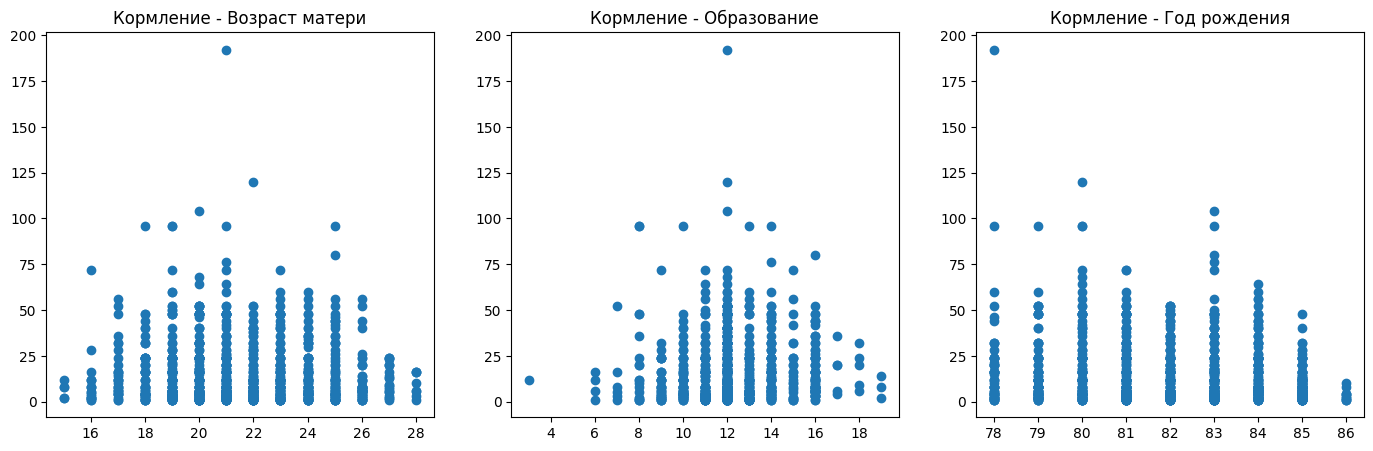

In [ ]:
# Влияние количественных признаков на продолжительность кормления
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1, ncols=3,figsize=(17, 5))

ax1.scatter(data['agemth'],data['duration'])
ax1.set_title('Кормление - Возраст матери')

ax2.scatter(data['yschool'],data['duration'])
ax2.set_title('Кормление - Образование')

ax3.scatter(data['ybirth'],data['duration'])
ax3.set_title('Кормление - Год рождения')

plt.show()

In [ ]:
# Посмотрим на влияние вредных привычек на длительность кормления
dur, g1, g2 = [], [], []
dur = sorted(pd.unique(data['duration']))
for i in dur:
  g1.append(len(data[(data['duration']==i) & (data['smoke']==0)]))
  g2.append(len(data[(data['duration']==i) & (data['smoke']==1)]))
dur2 = dur
g3, g4 = [], []
for i in dur2:
  g3.append(len(data[(data['duration']==i) & (data['alcohol']==0)]))
  g4.append(len(data[(data['duration']==i) & (data['alcohol']==1)]))

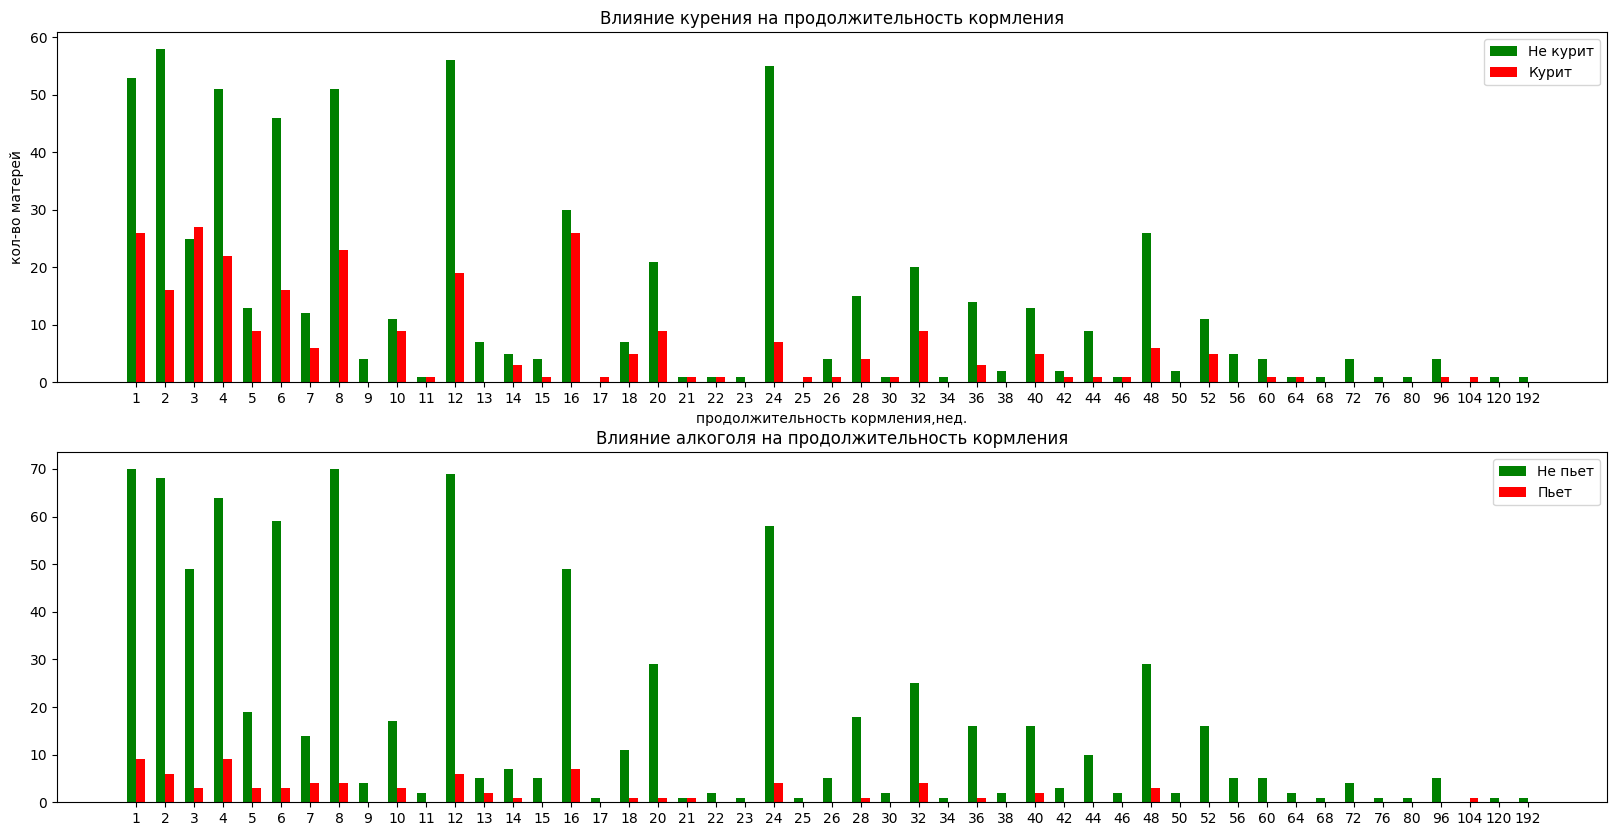

In [ ]:
width = 0.3
x = np.arange(len(dur))
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1,figsize=(20, 10))

rects1 = ax1.bar(x - width/2, g1, width, label='Не курит', color='g')
rects2 = ax1.bar(x + width/2, g2, width, label='Курит', color='r')
ax1.set_title('Влияние курения на продолжительность кормления')
ax1.set_xticks(x)
ax1.set_xticklabels(dur)
ax1.set_xlabel('продолжительность кормления,нед.')
ax1.set_ylabel('кол-во матерей')
ax1.legend()

rects3 = ax2.bar(x - width/2, g3, width, label='Не пьет', color='g')
rects4 = ax2.bar(x + width/2, g4, width, label='Пьет', color='r')
ax2.set_title('Влияние алкоголя на продолжительность кормления')
ax2.set_xticks(x)
ax2.set_xticklabels(dur)
ax1.set_xlabel('продолжительность кормления,нед.')
ax1.set_ylabel('кол-во матерей')
ax2.legend()
plt.show()

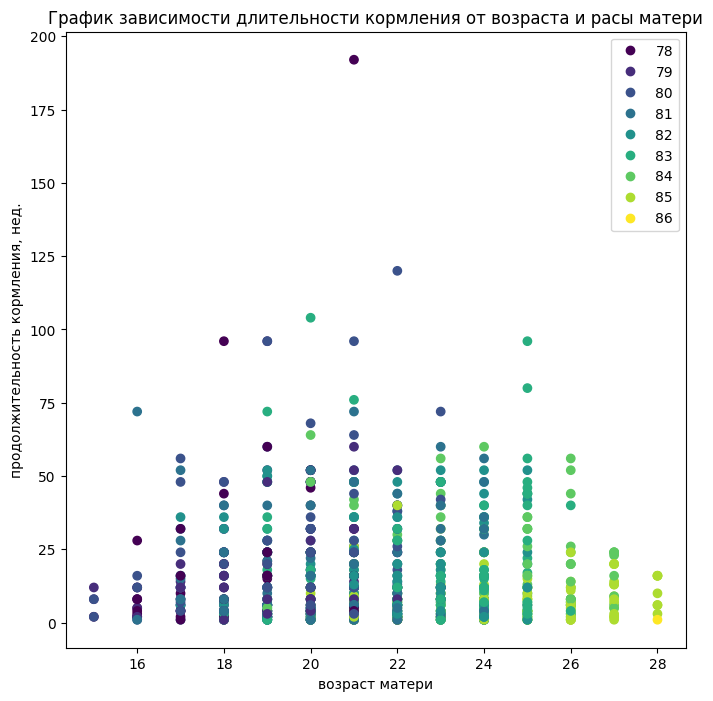

In [ ]:
plt.figure(figsize=(8,8))
s = plt.scatter(data['agemth'], data['duration'], c=data['ybirth'])
plt.title('График зависимости длительности кормления от возраста и расы матери')
plt.xlabel('возраст матери')
plt.ylabel('продолжительность кормления, нед.')
plt.legend(s.legend_elements()[0], list(set(data['ybirth'])))
plt.show()

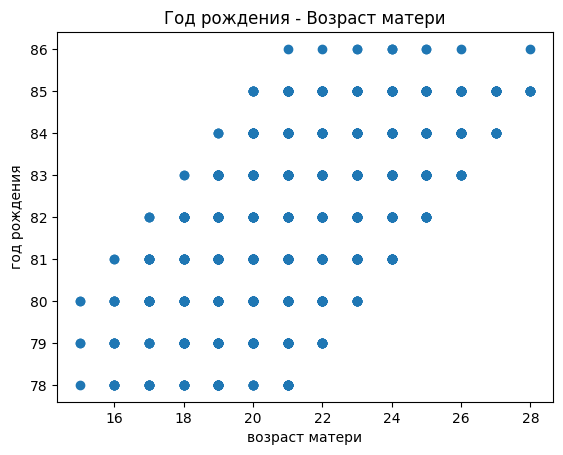

In [ ]:
plt.scatter(data['agemth'],data['ybirth'])
plt.title('Год рождения - Возраст матери')
plt.xlabel('возраст матери')
plt.ylabel('год рождения')
plt.show()